In [1]:
import pandas as pd

# load from file
clean_data = pd.read_csv('../data/EstrazioneTamponi/EstrazioniTamponi_clean_full.csv')
clean_data['DataOraAccettazione'] = pd.to_datetime(clean_data['DataOraAccettazione'], format='%Y-%m-%d %H:%M:%S', errors='raise')

print("lette " + str(len(clean_data)) + " righe")

lette 690153 righe


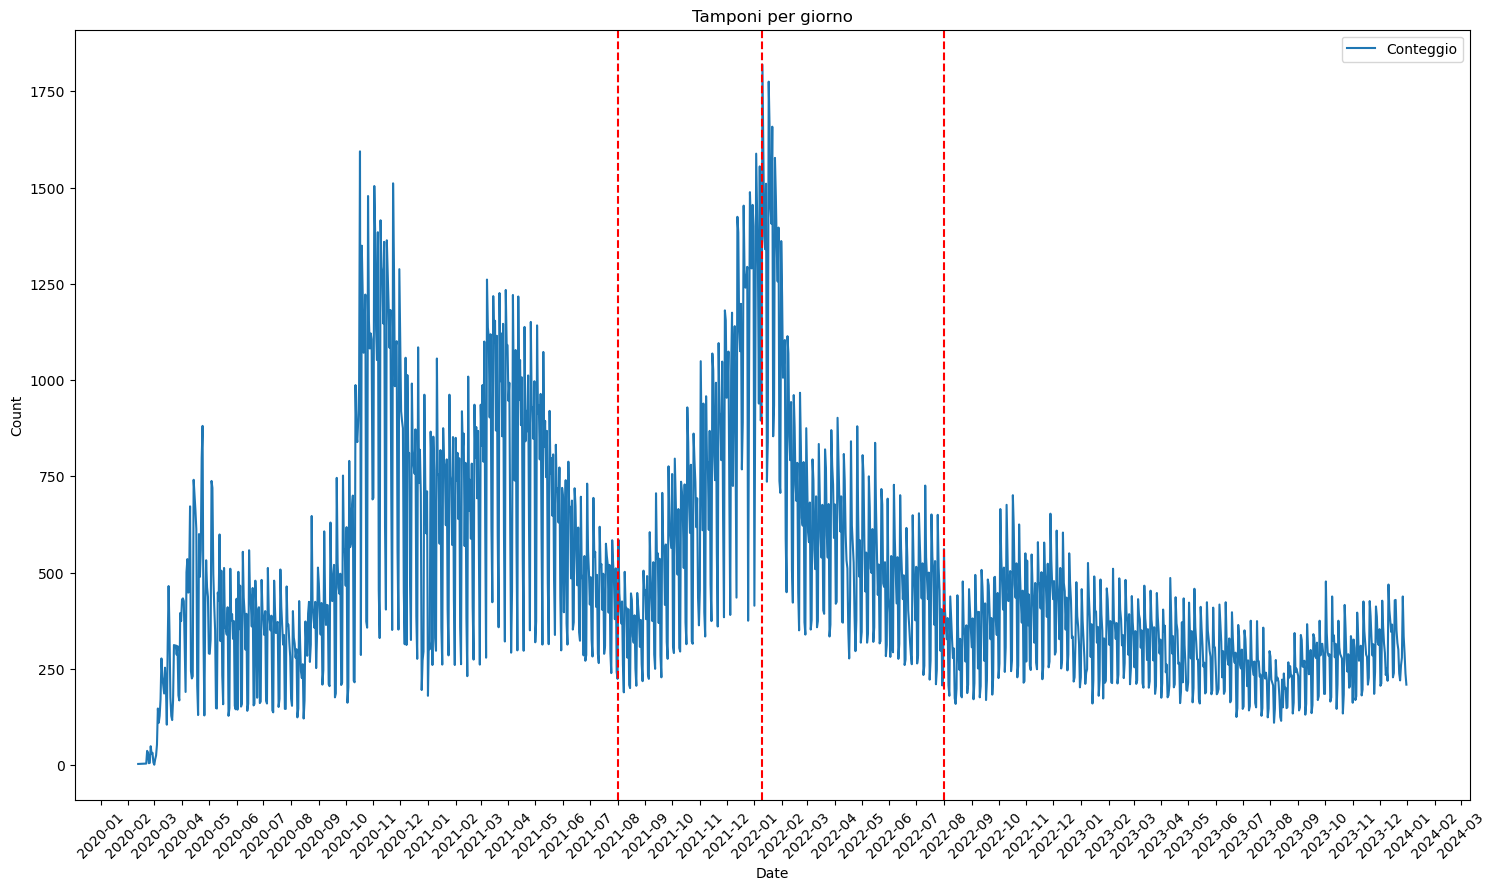

In [2]:
# plot tamponi per giorno
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

picco_pandemico = '2022-01-10'
inizio_pandemia = '2021-08-01'
fine_pandemia   = '2022-08-01'

vertical_lines = [ picco_pandemico, inizio_pandemia, fine_pandemia ]

# plot vertical lines for each picco pandemico
plot_data = clean_data.drop(columns=['Codice Reparto', 'Codice Analisi'])
plot_data.groupby(plot_data['DataOraAccettazione'].dt.date).sum().plot()
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Tamponi per giorno")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().set_size_inches(18, 10)
for p in vertical_lines:
    plt.axvline(x=p, color='r', linestyle='--')
plt.show()


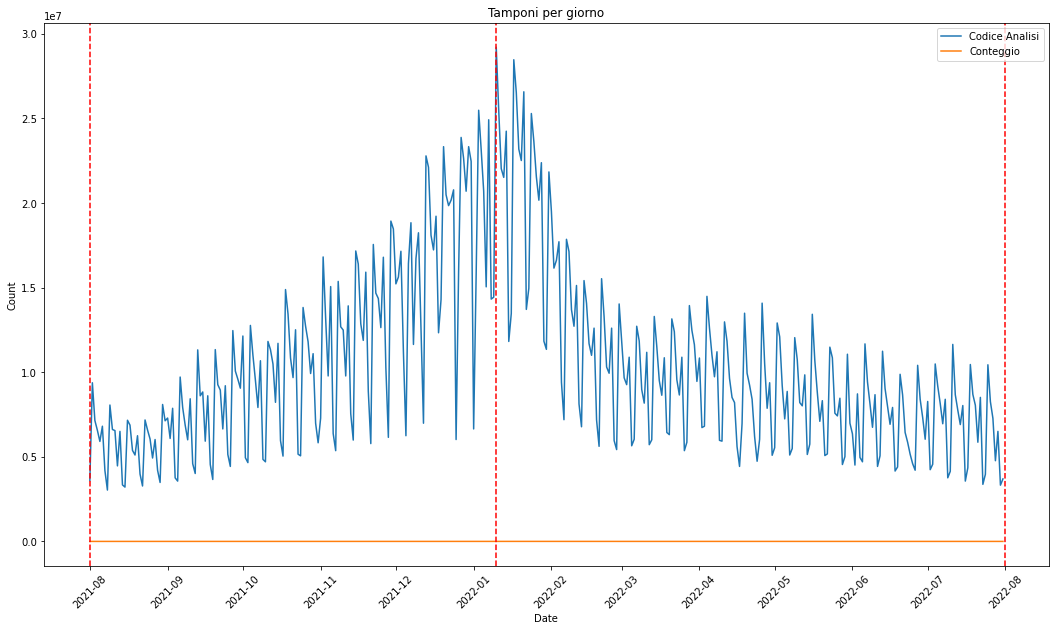

In [13]:
# filter: DataOraAccettazione > inizio_pandemia and DataOraAccettazione < fine_pandemia

picco_data = clean_data[(clean_data['DataOraAccettazione'] > inizio_pandemia) & (clean_data['DataOraAccettazione'] < fine_pandemia)]
picco_data = picco_data.drop(columns=['Codice Reparto'])
picco_data.groupby(picco_data['DataOraAccettazione'].dt.date).sum().plot()
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Tamponi per giorno")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().set_size_inches(18, 10)
for p in vertical_lines:
    plt.axvline(x=p, color='r', linestyle='--')
plt.show()

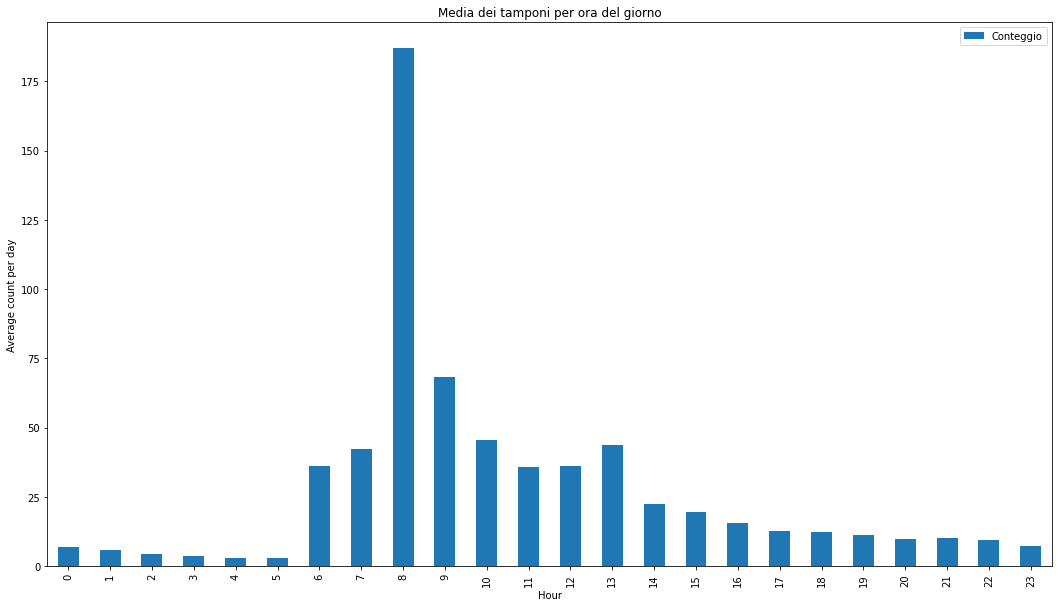

In [66]:
# # plot tamponi per ora del giorno

# number_of_days = len(picco_data['DataOraAccettazione'].dt.date.unique())
# plot_data = picco_data.groupby(plot_data['DataOraAccettazione'].dt.hour).sum()
# plot_data = plot_data / number_of_days
# plot_data.plot(kind='bar')
# plt.xlabel("Hour")
# plt.xticks(range(0, 24))
# plt.ylabel("Average count per day")
# plt.title("Media dei tamponi per ora del giorno")
# plt.gcf().set_size_inches(18, 10)
# plt.show()


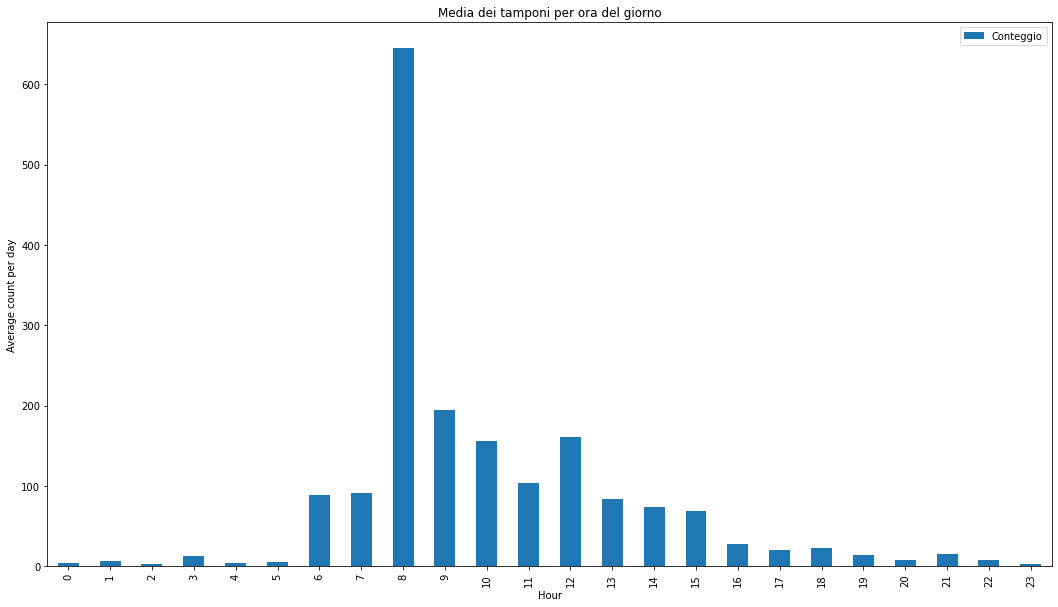

In [67]:
# # plot tamponi per ora del giorno durante il picco pandemico

# picco_day_data = clean_data[(clean_data['DataOraAccettazione'] > picco_pandemico) & (clean_data['DataOraAccettazione'] < pd.to_datetime(picco_pandemico) + pd.Timedelta(days=1))]
# plot_data = picco_day_data.drop(columns=['Codice Reparto', 'Codice Analisi'])
# plot_data = plot_data.groupby(plot_data['DataOraAccettazione'].dt.hour).sum()
# plot_data.plot(kind='bar')
# plt.xlabel("Hour")
# plt.xticks(range(0, 24))
# plt.ylabel("Average count per day")
# plt.title("Media dei tamponi per ora del giorno")
# plt.gcf().set_size_inches(18, 10)
# plt.show()


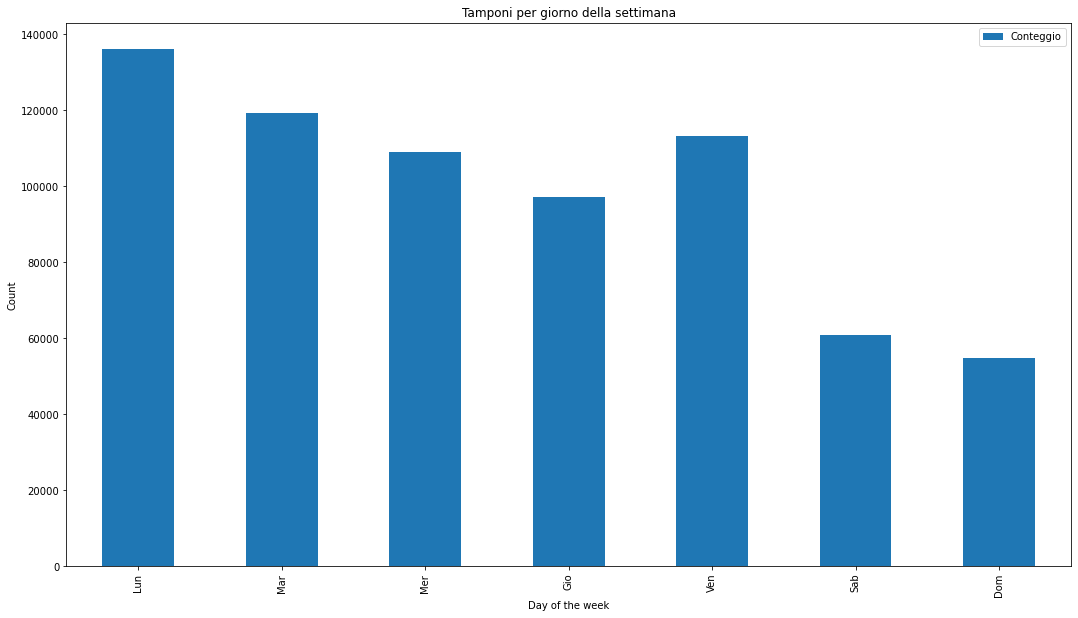

In [70]:
# # plot tamponi per giorno della settimana (L/M/M/G/V/S/D)

# plot_data = clean_data.drop(columns=['Codice Reparto', 'Codice Analisi'])
# plot_data['GiornoSettimana'] = plot_data['DataOraAccettazione'].dt.dayofweek
# plot_data = plot_data.groupby(plot_data['GiornoSettimana']).sum()
# plot_data.plot(kind='bar')
# plt.xlabel("Day of the week")
# plt.xticks(range(0, 7), ['Lun', 'Mar', 'Mer', 'Gio', 'Ven', 'Sab', 'Dom'])
# plt.ylabel("Count")
# plt.title("Tamponi per giorno della settimana")
# plt.gcf().set_size_inches(18, 10)
# plt.show()

In [71]:
n_piastre = 1
tamponi = n_piastre*94
tempo_macchinario = 120

n_tamponi_max_routine = tamponi * int(7.50*60 / (tempo_macchinario))
n_tamponi_max_overnight = tamponi * int(24*60 / (tempo_macchinario))

n_tamponi_max_routine, n_tamponi_max_overnight

(282, 1128)

In [80]:
picco_data_solo_RNA = clean_data[clean_data['Codice Analisi'] != 16058]
picco_data_solo_RNA = picco_data_solo_RNA.drop(columns=['Codice Analisi'])
print(len(picco_data_solo_RNA))

451986


In [14]:
# filtrare i tamponi che non sono RNA
print(len(picco_data))
picco_data_solo_RNA = picco_data[picco_data['Codice Analisi'] != 16058]
picco_data_solo_RNA = picco_data_solo_RNA.drop(columns=['Codice Analisi'])
print(len(picco_data_solo_RNA))

percentage = len(picco_data_solo_RNA) / len(picco_data)
percentage

237196
176353


0.7434906153560769

In [81]:
# conteggio tamponi residui di ogni giorno durante il picco pandemico
# iterate over days:
#   - total_tamponi = tamponi for that day
#   - tamponi_residui = total_tamponi - n_tamponi_max

conteggio = []
analizzati = []
residui = []
tamponi_residui = 0

# n_tamponi_max = n_tamponi_max_routine
n_tamponi_max = n_tamponi_max_overnight

for day in picco_data_solo_RNA['DataOraAccettazione'].dt.date.unique():
        
    tamponi_residui_previous_day = tamponi_residui
    tamponi_day = picco_data_solo_RNA[picco_data_solo_RNA['DataOraAccettazione'].dt.date == day]
    sum_tamponi = tamponi_day['DataOraAccettazione'].count()
    conteggio.append(sum_tamponi)
    
    # tamponi_residui = sum_tamponi + tamponi_residui_previous_day - max_tamponi
    
    tamponi_residui = sum_tamponi + tamponi_residui_previous_day
    
    # tamponi_residui = tamponi_residui - n_tamponi_max
    if tamponi_residui < n_tamponi_max:
        analizzati.append(tamponi_residui)
        tamponi_residui = 0
    else:
        analizzati.append(n_tamponi_max)
        tamponi_residui = tamponi_residui - n_tamponi_max
    
    residui.append(tamponi_residui)
    
    print(day, conteggio[-1], analizzati[-1], residui[-1])


2020-02-22 37 37 0
2020-02-23 32 32 0
2020-02-26 49 49 0
2020-02-27 29 29 0
2020-02-28 32 32 0
2020-03-03 25 25 0
2020-03-04 53 53 0
2020-03-05 147 147 0
2020-03-06 110 110 0
2020-03-07 128 128 0
2020-03-08 171 171 0
2020-03-09 277 277 0
2020-03-10 230 230 0
2020-03-11 209 209 0
2020-03-12 186 186 0
2020-03-13 253 253 0
2020-03-14 205 205 0
2020-03-15 105 105 0
2020-03-16 315 315 0
2020-03-17 463 463 0
2020-03-18 345 345 0
2020-03-19 174 174 0
2020-03-20 123 123 0
2020-03-21 117 117 0
2020-03-22 167 167 0
2020-03-23 311 311 0
2020-03-24 307 307 0
2020-03-25 311 311 0
2020-03-26 287 287 0
2020-03-27 308 308 0
2020-03-28 181 181 0
2020-03-29 168 168 0
2020-03-30 393 393 0
2020-03-31 374 374 0
2020-04-01 424 424 0
2020-04-02 432 432 0
2020-04-03 425 425 0
2020-04-04 310 310 0
2020-04-05 188 188 0
2020-04-06 499 499 0
2020-04-07 534 534 0
2020-04-08 447 447 0
2020-04-09 494 494 0
2020-04-10 670 670 0
2020-04-11 244 244 0
2020-04-12 224 224 0
2020-04-13 231 231 0
2020-04-14 741 741 0
2020-0

In [51]:
# ## with overnight (if needed)
# # compute a score for each day from start to end of pandemy
# # iterate over days:
# #   - total_tamponi = tamponi for that day
# #   - tamponi_residui = total_tamponi - n_tamponi_max

# residui = []
# analizzati = []
# overnight = []
# emergenza = []
# tamponi_residui = 0

# for day in picco_data_solo_RNA['DataOraAccettazione'].dt.date.unique():
        
#     tamponi_residui_previous_day = tamponi_residui
#     tamponi_day = picco_data[picco_data['DataOraAccettazione'].dt.date == day]
#     sum_tamponi = tamponi_day['DataOraAccettazione'].count()
    
#     # tamponi_residui = sum_tamponi + tamponi_residui_previous_day - max_tamponi
    
#     tamponi_residui = sum_tamponi + tamponi_residui_previous_day
    
#     # ottimo - base
#     if tamponi_residui <= n_tamponi_max_routine:
#         analizzati.append(tamponi_residui)
#         tamponi_residui = 0
#     # overnight
#     elif tamponi_residui > n_tamponi_max_routine and tamponi_residui <= n_tamponi_max_overnight:
#         analizzati.append(tamponi_residui)
#         tamponi_residui = 0
#         overnight.append(day)
#     # pessimo - emergenza
#     else:
#         analizzati.append(n_tamponi_max_overnight)
#         tamponi_residui = tamponi_residui - n_tamponi_max_overnight
#         emergenza.append(day)
    
#     print(day, sum_tamponi, tamponi_residui)
#     residui.append(tamponi_residui)


2021-08-01 224 0
2021-08-02 584 0
2021-08-03 445 0
2021-08-04 409 0
2021-08-05 368 0
2021-08-06 424 0
2021-08-07 261 0
2021-08-08 189 0
2021-08-09 502 0
2021-08-10 412 0
2021-08-11 408 0
2021-08-12 278 0
2021-08-13 405 0
2021-08-14 208 0
2021-08-15 200 0
2021-08-16 446 0
2021-08-17 428 0
2021-08-18 335 0
2021-08-19 318 0
2021-08-20 389 0
2021-08-21 248 0
2021-08-22 204 0
2021-08-23 447 0
2021-08-24 410 0
2021-08-25 377 0
2021-08-26 307 0
2021-08-27 375 0
2021-08-28 262 0
2021-08-29 217 0
2021-08-30 504 0
2021-08-31 444 0
2021-09-01 454 0
2021-09-02 379 0
2021-09-03 490 0
2021-09-04 234 0
2021-09-05 222 0
2021-09-06 605 0
2021-09-07 493 0
2021-09-08 428 0
2021-09-09 374 0
2021-09-10 525 0
2021-09-11 286 0
2021-09-12 250 0
2021-09-13 705 0
2021-09-14 536 0
2021-09-15 550 0
2021-09-16 369 0
2021-09-17 536 0
2021-09-18 283 0
2021-09-19 228 0
2021-09-20 706 0
2021-09-21 577 0
2021-09-22 557 0
2021-09-23 414 0
2021-09-24 573 0
2021-09-25 320 0
2021-09-26 276 0
2021-09-27 776 0
2021-09-28 627

In [65]:
## with overnight (buffer_piastre)
# compute a score for each day from start to end of pandemy
# iterate over days:
#   - total_tamponi = tamponi for that day
#   - tamponi_residui = total_tamponi - n_tamponi_max

conteggio = []
residui = []
analizzati = []
overnight_starts = []
overnight_ends = []
tamponi_residui = 0

overnight = False
buffer_piastre = 2
for day in picco_data['DataOraAccettazione'].dt.date.unique():
        
    tamponi_residui_previous_day = tamponi_residui
    tamponi_day = picco_data[picco_data['DataOraAccettazione'].dt.date == day]
    sum_tamponi = tamponi_day['DataOraAccettazione'].count()
    
    conteggio.append(sum_tamponi)
    
    # tamponi_residui = sum_tamponi + tamponi_residui_previous_day - max_tamponi
    
    tamponi_residui = sum_tamponi + tamponi_residui_previous_day
    
    # gestione routine, stop overnight
    if tamponi_residui < n_tamponi_max_routine  + buffer_piastre*tamponi:
        analizzati.append(tamponi_residui)
        tamponi_residui = 0
        if overnight:
            overnight_ends.append(day)
            overnight = False
    
    # gestione overnight, start overnight
    # elif tamponi_residui > n_tamponi_max_routine + tamponi:
    else:
        if tamponi_residui < n_tamponi_max_overnight:
            analizzati.append(tamponi_residui)
            tamponi_residui = 0
        else:
            analizzati.append(n_tamponi_max_overnight)
            tamponi_residui = tamponi_residui - n_tamponi_max_overnight
            
        if not overnight:
            overnight_starts.append(day)
            overnight = True
    
    # elif tamponi_residui > n_tamponi_max_overnight:
    #     tamponi_residui = tamponi_residui - n_tamponi_max_overnight
    #     analizzati.append(n_tamponi_max_overnight)
    
    residui.append(tamponi_residui)
    
    print(day, conteggio[-1], analizzati[-1], residui[-1])


2021-08-01 224 224 0
2021-08-02 584 584 0
2021-08-03 445 445 0
2021-08-04 409 409 0
2021-08-05 368 368 0
2021-08-06 424 424 0
2021-08-07 261 261 0
2021-08-08 189 189 0
2021-08-09 502 502 0
2021-08-10 412 412 0
2021-08-11 408 408 0
2021-08-12 278 278 0
2021-08-13 405 405 0
2021-08-14 208 208 0
2021-08-15 200 200 0
2021-08-16 446 446 0
2021-08-17 428 428 0
2021-08-18 335 335 0
2021-08-19 318 318 0
2021-08-20 389 389 0
2021-08-21 248 248 0
2021-08-22 204 204 0
2021-08-23 447 447 0
2021-08-24 410 410 0
2021-08-25 377 377 0
2021-08-26 307 307 0
2021-08-27 375 375 0
2021-08-28 262 262 0
2021-08-29 217 217 0
2021-08-30 504 504 0
2021-08-31 444 444 0
2021-09-01 454 454 0
2021-09-02 379 379 0
2021-09-03 490 490 0
2021-09-04 234 234 0
2021-09-05 222 222 0
2021-09-06 605 605 0
2021-09-07 493 493 0
2021-09-08 428 428 0
2021-09-09 374 374 0
2021-09-10 525 525 0
2021-09-11 286 286 0
2021-09-12 250 250 0
2021-09-13 705 705 0
2021-09-14 536 536 0
2021-09-15 550 550 0
2021-09-16 369 369 0
2021-09-17 53

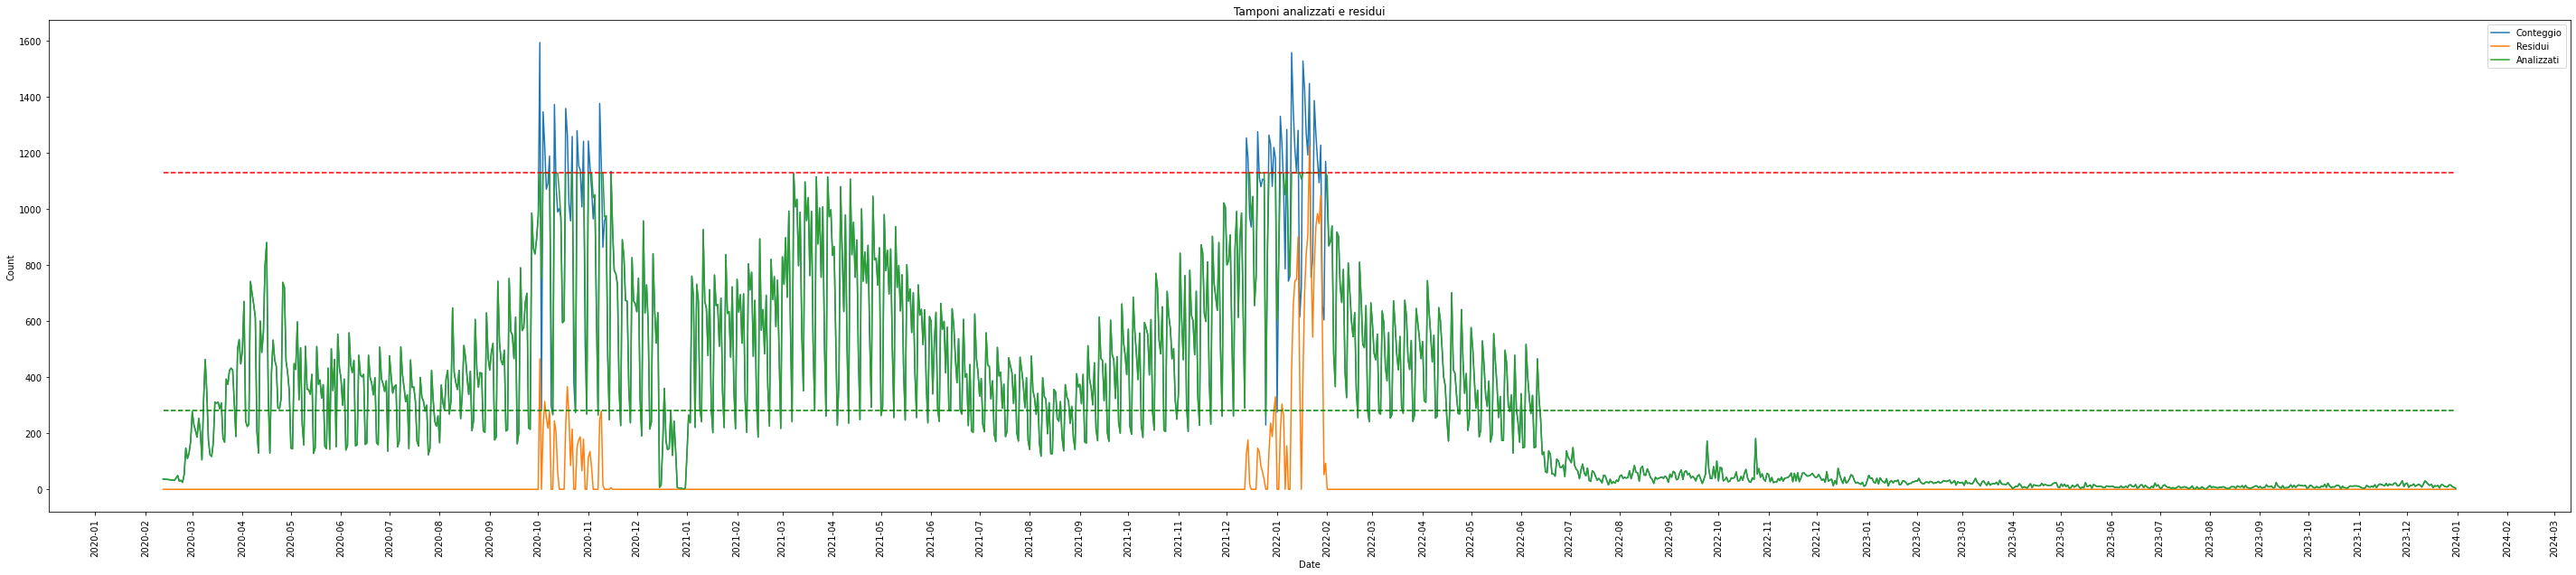

In [83]:
# plot the number of tamponi per day
# and the number of tamponi residui
# over the period of the pandemy

plot_data = picco_data_solo_RNA.groupby(picco_data_solo_RNA['DataOraAccettazione'].dt.date).sum()
plot_data['Conteggio'] = conteggio
plot_data['Residui'] = residui
plot_data['Analizzati'] = analizzati
plot_data.plot()
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Tamponi analizzati e residui")
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().set_size_inches(50, 10)

plt.hlines(y=n_tamponi_max_routine, xmin=plot_data.index.min(), xmax=plot_data.index.max(), color='g', linestyle='--')
# plt.hlines(y=n_tamponi_max_routine+buffer_piastre*tamponi, xmin=plot_data.index.min(), xmax=plot_data.index.max(), color='orange', linestyle='--')
plt.hlines(y=n_tamponi_max_overnight, xmin=plot_data.index.min(), xmax=plot_data.index.max(), color='r', linestyle='--')

# plot start/end overnight
# for start in overnight_starts:
#     plt.axvline(x=start, color='g', linestyle='--')
# for end in overnight_ends:
#     plt.axvline(x=end, color='r', linestyle='--')

# # plot overnight and emergency
# for o in overnight:
#     plt.axvline(x=o, color='g', linestyle='--')
# for e in emergenza:
#     plt.axvline(x=e, color='r', linestyle='--')

In [67]:
# quante sedute overnight ci sono e quanto durano?
print("overnight starts: " + str(len(overnight_starts)))

days_sum = 0
for i in range(len(overnight_starts)):
    durata = overnight_ends[i] - overnight_starts[i]
    print("durata overnight: " + str(durata))
    days_sum += durata.days

print("media durata overnight: " + str(days_sum / len(overnight_starts)))
print("somma giorni: " + str(days_sum))

overnight starts: 55
durata overnight: 1 day, 0:00:00
durata overnight: 1 day, 0:00:00
durata overnight: 1 day, 0:00:00
durata overnight: 1 day, 0:00:00
durata overnight: 2 days, 0:00:00
durata overnight: 1 day, 0:00:00
durata overnight: 3 days, 0:00:00
durata overnight: 1 day, 0:00:00
durata overnight: 3 days, 0:00:00
durata overnight: 1 day, 0:00:00
durata overnight: 5 days, 0:00:00
durata overnight: 5 days, 0:00:00
durata overnight: 5 days, 0:00:00
durata overnight: 5 days, 0:00:00
durata overnight: 5 days, 0:00:00
durata overnight: 4 days, 0:00:00
durata overnight: 6 days, 0:00:00
durata overnight: 6 days, 0:00:00
durata overnight: 6 days, 0:00:00
durata overnight: 6 days, 0:00:00
durata overnight: 6 days, 0:00:00
durata overnight: 68 days, 0:00:00
durata overnight: 5 days, 0:00:00
durata overnight: 5 days, 0:00:00
durata overnight: 5 days, 0:00:00
durata overnight: 5 days, 0:00:00
durata overnight: 5 days, 0:00:00
durata overnight: 5 days, 0:00:00
durata overnight: 5 days, 0:00:00

In [69]:
# quanti tamponi durante la pandemia?
picco_data = clean_data[(clean_data['DataOraAccettazione'] > inizio_pandemia) & (clean_data['DataOraAccettazione'] < fine_pandemia)]

n_tamponi = picco_data['DataOraAccettazione'].count()
print("Tamponi durante la pandemia: " + str(n_tamponi))

Tamponi durante la pandemia: 237196


In [3]:
# quanti tamponi nel giorno del picco pandemico?
picco_data = clean_data[(clean_data['DataOraAccettazione'] > picco_pandemico) & (clean_data['DataOraAccettazione'] < pd.to_datetime(picco_pandemico) + pd.Timedelta(days=1))]
# picco_data.groupby(picco_data['DataOraAccettazione'].dt.date).sum()
n_tamponi = picco_data['DataOraAccettazione'].count()
print("Tamponi nel giorno del picco pandemico: " + str(n_tamponi))

Tamponi nel giorno del picco pandemico: 1816


In [51]:
# caricamento corrispondenza codice reparto -> nome reparto

corrispondenza = pd.read_csv('./corrispondenza_codice_nome_reparto.csv', sep=';')
corrispondenza['codice'] = corrispondenza['codice'].astype(str)
corrispondenza.head()

map_reparto = {}
for index, row in corrispondenza.iterrows():
    map_reparto[row['codice']] = str(row['nome_reparto'])
    

In [56]:
istanza = picco_data[picco_data['Codice Analisi'] != 16058]
istanza = istanza.drop(columns=['Codice Analisi', 'Nome Analisi', 'Nome Reparto', 'Materiale', 'Sesso'])

# ottenimento min da DataOraAccettazione
istanza['Min'] = (istanza['DataOraAccettazione'] - pd.to_datetime(picco_pandemico)).dt.total_seconds() / 60
istanza['Min'] = istanza['Min'].astype(int)
istanza = istanza.drop(columns=['DataOraAccettazione'])

# ottenimento nome reparto da codice reparto; se non esiste, mettere '6'
istanza['Nome Reparto'] = istanza['Codice Reparto'].map(map_reparto)
istanza['Nome Reparto'] = istanza['Nome Reparto'].fillna('6')
istanza = istanza.drop(columns=['Codice Reparto'])

istanza.head()

# save to file
istanza.to_csv('../data/istanza_picco_pandemico_2022-01-10.csv', index=False)